<a href="https://colab.research.google.com/github/grpavithra/Gen-AI/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

#Read CSV data
data = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [9]:
#preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# percent of missing "Gender"
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Gender
Male      489
Female    112
Name: count, dtype: int64


<ipython-input-13-842711f66598>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette = 'Set2')


<Axes: xlabel='Gender', ylabel='count'>

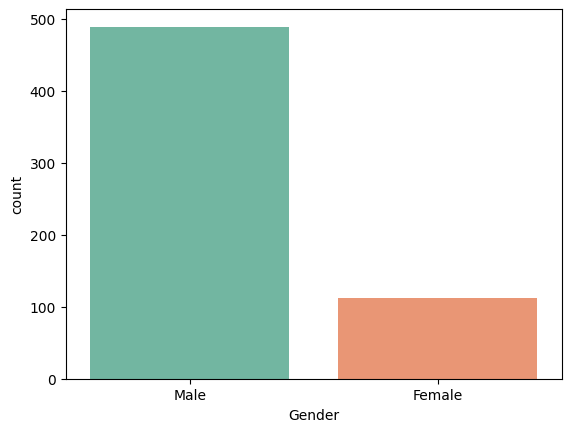

In [13]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

In [14]:
# percent of missing "Married"
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Married
Yes    398
No     213
Name: count, dtype: int64


<ipython-input-15-2e6db6f78ab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=data, palette = 'Set2')


<Axes: xlabel='Married', ylabel='count'>

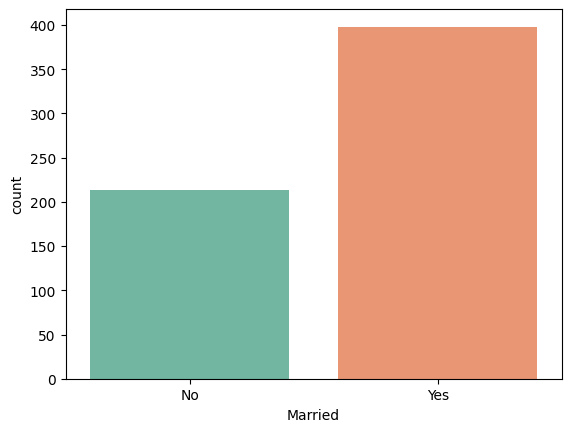

In [15]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set2')

In [16]:
# percent of missing "Dependents"
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-17-9a9946eef2d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=data, palette = 'Set2')


<Axes: xlabel='Dependents', ylabel='count'>

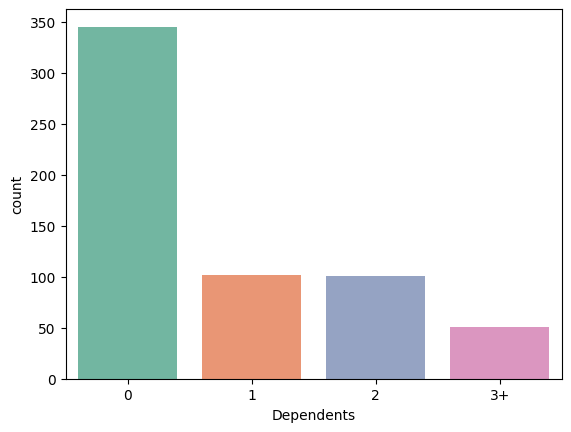

In [17]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set2')

In [18]:
# percent of missing "Self_Employed"
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


<ipython-input-19-5f65ad932d0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=data, palette = 'Set2')


<Axes: xlabel='Self_Employed', ylabel='count'>

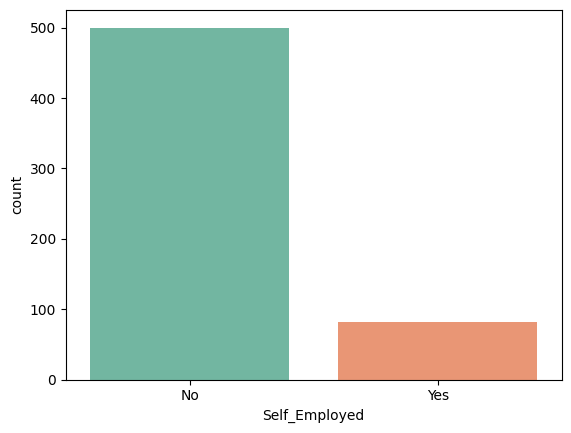

In [19]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

In [20]:
# percent of missing "LoanAmount"
print('Percent of missing "LoanAmount" records is %.2f%%' %((data['LoanAmount'].isnull().sum()/data.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


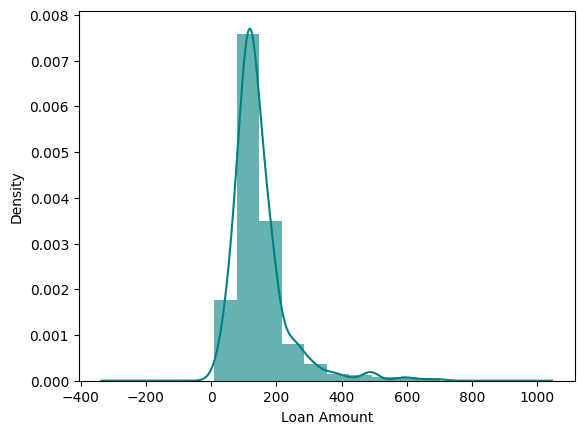

In [21]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

In [22]:
# percent of missing "Loan_Amount_Term"
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((data['Loan_Amount_Term'].isnull().sum()/data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term :
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


<ipython-input-23-e5ab8320972f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

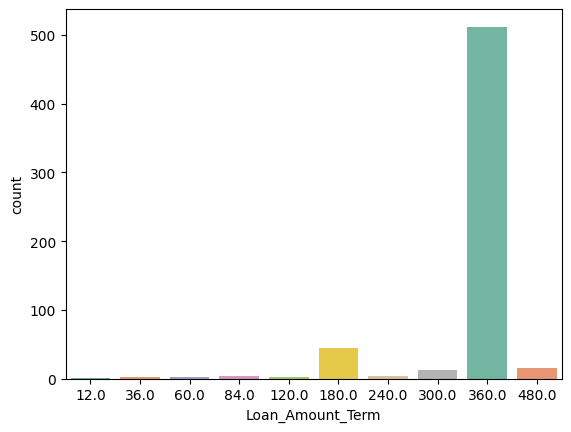

In [23]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

In [24]:
# percent of missing "Credit_History"
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))


Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history :
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


<ipython-input-25-2890e265e93d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=data, palette = 'Set2')


<Axes: xlabel='Credit_History', ylabel='count'>

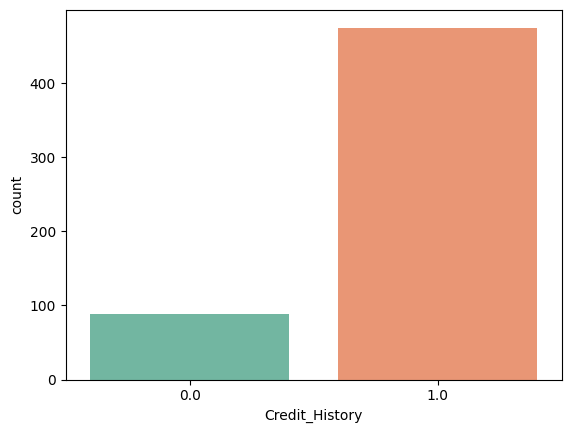

In [25]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')


In [27]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [28]:
#Check missing values
train_data.isnull().sum()
train_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [29]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [30]:
#Preview data information
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
#Separate feature and target
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []


In [32]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 78.17%


In [33]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 75.24%


In [34]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 69.71%


In [35]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 61.40%


In [36]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The accuration of classification is 57.13%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


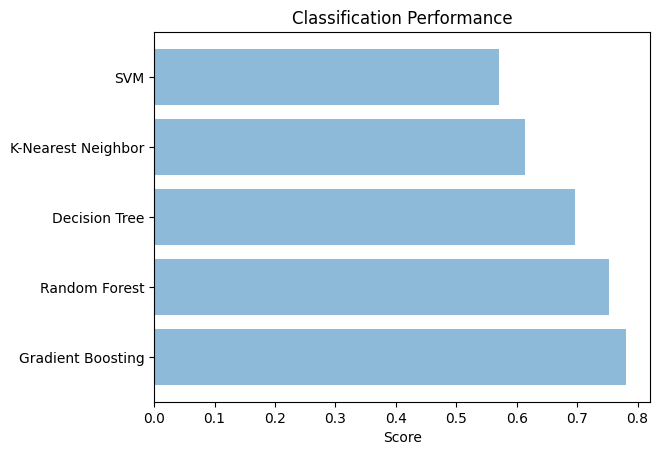

In [37]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()